In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [3]:
import os

base_dir = '/content/cats_and_dogs'  # 👈 change this if your folder name/path is different
test_dir = os.path.join(base_dir, 'test')

print("Base directory:", base_dir)
print("Contents of test directory:", os.listdir(test_dir))


Base directory: /content/cats_and_dogs
Contents of test directory: ['17.jpg', '20.jpg', '33.jpg', '48.jpg', '23.jpg', '16.jpg', '50.jpg', '24.jpg', '27.jpg', '13.jpg', '30.jpg', '.DS_Store', '11.jpg', '18.jpg', '41.jpg', '10.jpg', '28.jpg', '3.jpg', '6.jpg', '39.jpg', '34.jpg', '12.jpg', '5.jpg', '42.jpg', '7.jpg', '40.jpg', '14.jpg', '36.jpg', '43.jpg', '45.jpg', '4.jpg', '21.jpg', '25.jpg', '19.jpg', '37.jpg', '9.jpg', '1.jpg', '35.jpg', '44.jpg', '46.jpg', '2.jpg', '15.jpg', '49.jpg', '38.jpg', '31.jpg', '26.jpg', '32.jpg', '47.jpg', '29.jpg', '22.jpg', '8.jpg']


In [4]:
import os

test_dir = os.path.join(base_dir, 'test')
print("Contents of test directory:", os.listdir(test_dir))


Contents of test directory: ['17.jpg', '20.jpg', '33.jpg', '48.jpg', '23.jpg', '16.jpg', '50.jpg', '24.jpg', '27.jpg', '13.jpg', '30.jpg', '.DS_Store', '11.jpg', '18.jpg', '41.jpg', '10.jpg', '28.jpg', '3.jpg', '6.jpg', '39.jpg', '34.jpg', '12.jpg', '5.jpg', '42.jpg', '7.jpg', '40.jpg', '14.jpg', '36.jpg', '43.jpg', '45.jpg', '4.jpg', '21.jpg', '25.jpg', '19.jpg', '37.jpg', '9.jpg', '1.jpg', '35.jpg', '44.jpg', '46.jpg', '2.jpg', '15.jpg', '49.jpg', '38.jpg', '31.jpg', '26.jpg', '32.jpg', '47.jpg', '29.jpg', '22.jpg', '8.jpg']


In [5]:
import shutil

test_subdir = os.path.join(test_dir, 'unknown')
os.makedirs(test_subdir, exist_ok=True)

for fname in os.listdir(test_dir):
    if fname.endswith('.jpg') or fname.endswith('.png'):
        shutil.move(os.path.join(test_dir, fname),
                    os.path.join(test_subdir, fname))

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the batch size and image dimensions
BATCH_SIZE = 100
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    directory=validation_dir,
    batch_size=BATCH_SIZE,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    directory=test_dir,
    batch_size=1,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


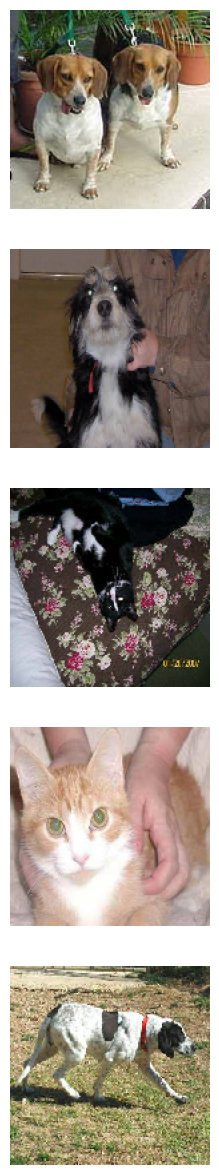

In [7]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [8]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True,
    fill_mode='nearest'
)


Found 2000 images belonging to 2 classes.


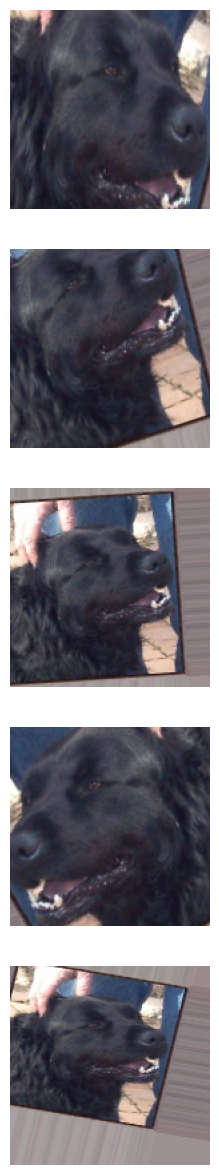

In [9]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
EPOCHS = 15

history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // BATCH_SIZE
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
16/20 ━━━━━━━━━━━━━━━━━━━━ 3s 992ms/step - accuracy: 0.5047 - loss: 1.1940

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 926ms/step - accuracy: 0.5021 - loss: 1.1441 - val_accuracy: 0.5000 - val_loss: 0.6906
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 732ms/step - accuracy: 0.5174 - loss: 0.6917 - val_accuracy: 0.5000 - val_loss: 0.6892
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 736ms/step - accuracy: 0.5183 - loss: 0.6883 - val_accuracy: 0.5810 - val_loss: 0.6683
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 16s 767ms/step - accuracy: 0.5792 - loss: 0.6660 - val_accuracy: 0.6230 - val_loss: 0.6395
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 726ms/step - accuracy: 0.5988 - loss: 0.6600 - val_accuracy: 0.5570 - val_loss: 0.7292
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 731ms/step - accuracy: 0.5997 - loss: 0.6620 - val_accuracy: 0.5560 - val_loss: 0.7286
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 764ms/step - accuracy: 0.6157 - loss: 0.6408 - val_accuracy: 0.6600 - val_loss: 0.6087
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 726ms/step - accuracy: 0.6535 - loss: 0.6369 - val_accuracy: 0.679

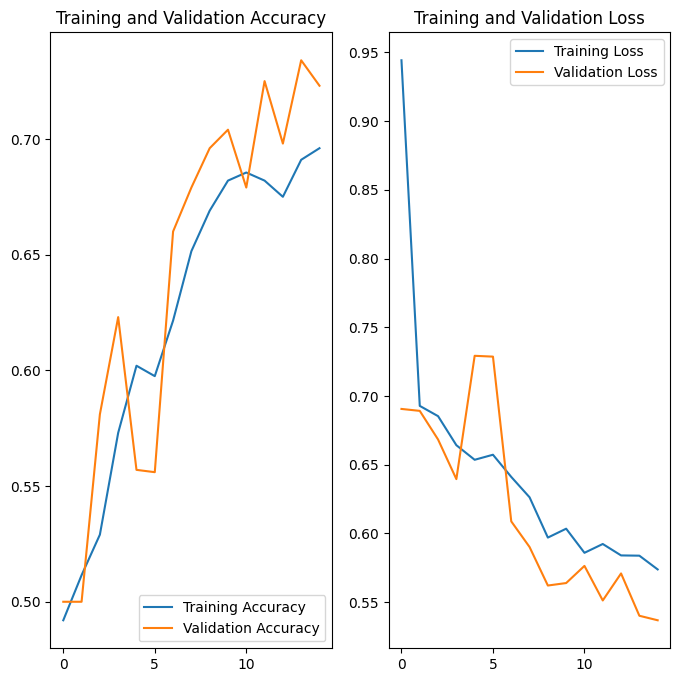

In [12]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Found 50 images belonging to 1 classes.
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


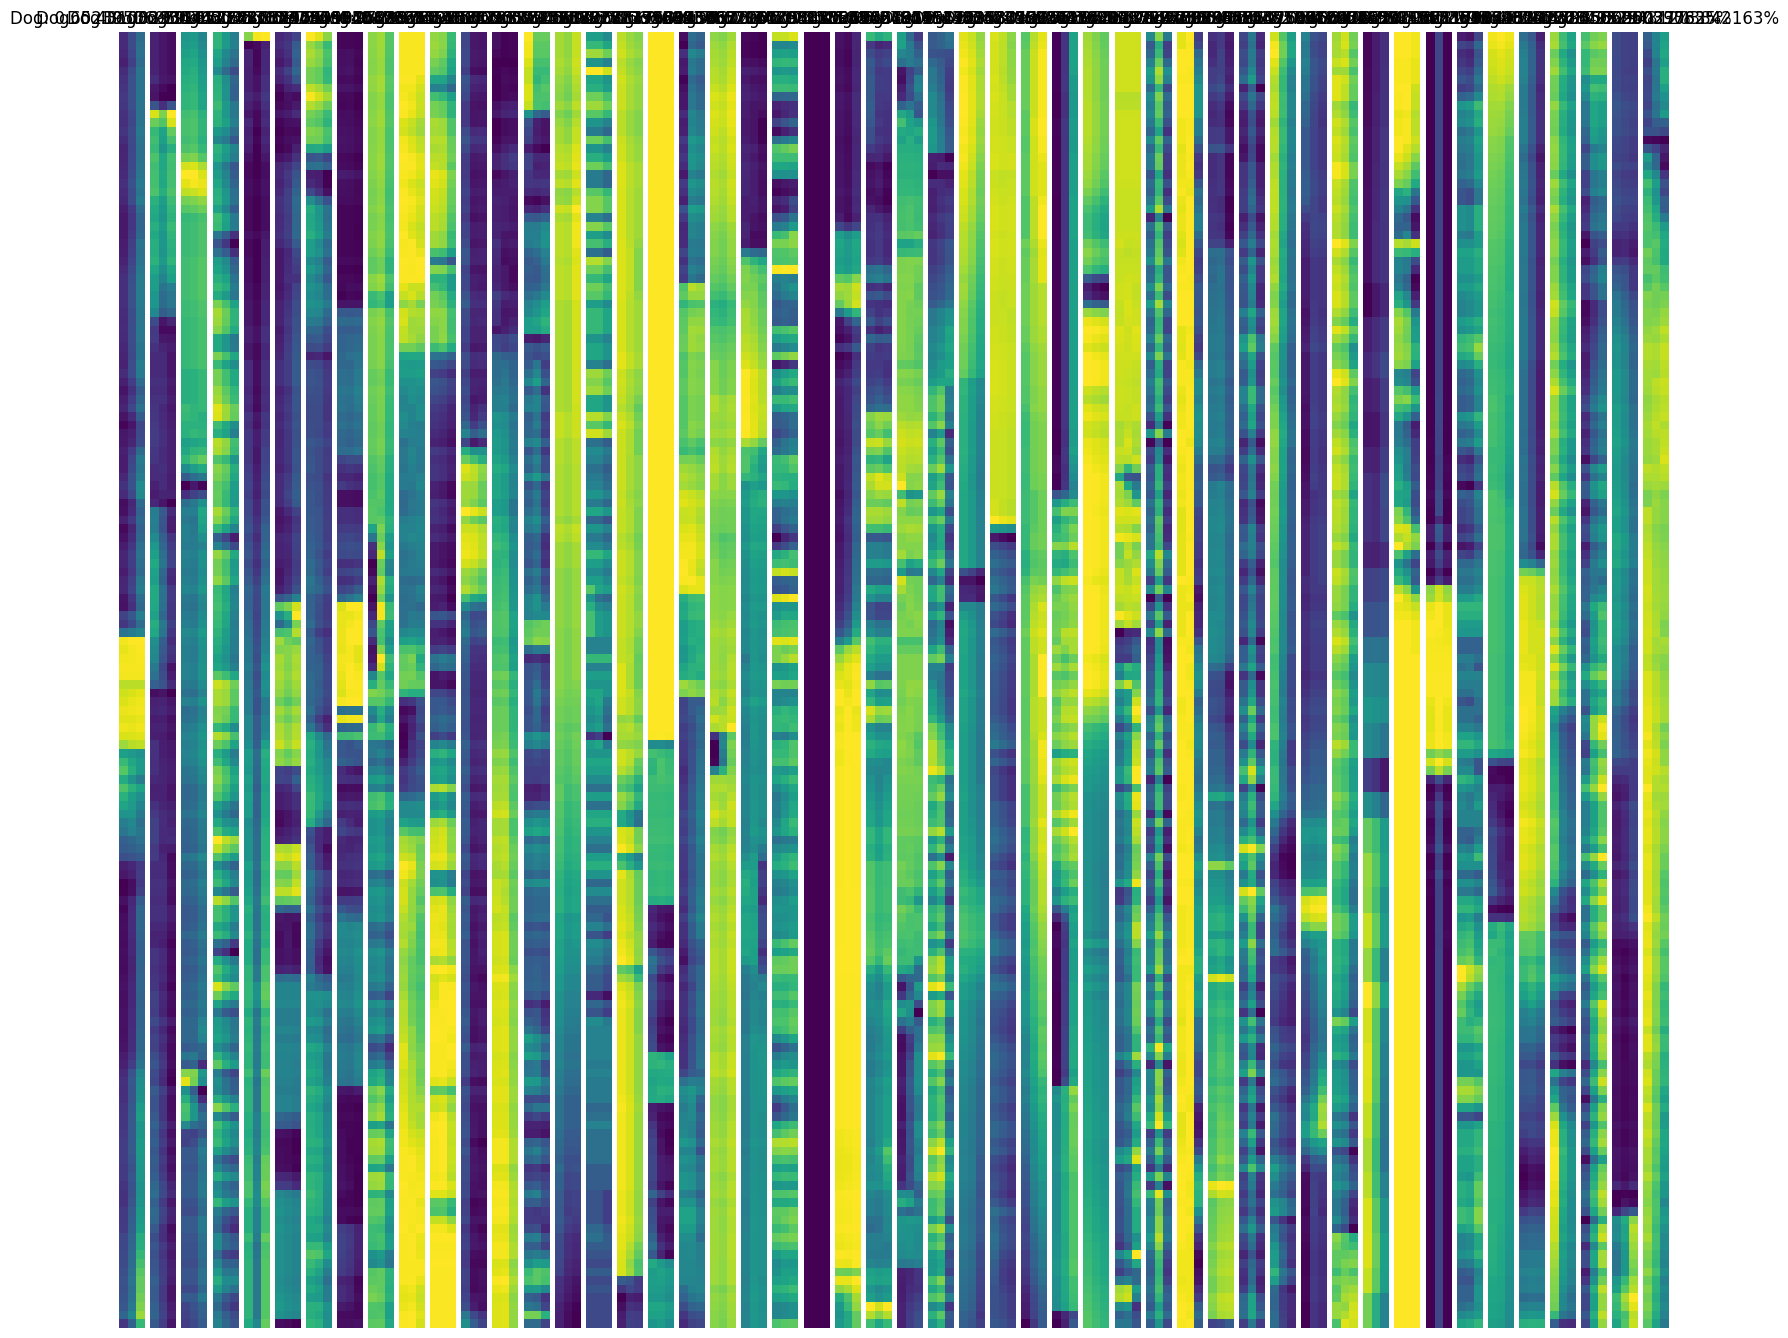

In [15]:
# 10️⃣ Predict whether each test image is a cat or a dog

import numpy as np

# Ensure test data generator is not shuffled and has correct structure
test_data_gen = test_image_generator.flow_from_directory(
    directory=os.path.join(base_dir, 'test'),
    batch_size=1,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode=None,
    shuffle=False
)

# Get predictions (probabilities between 0 and 1)
probabilities = model.predict(test_data_gen)

# Convert the probabilities to a flat list
probabilities = probabilities.flatten()

# Convert each probability to 0 (cat) or 1 (dog)
predictions = [1 if prob > 0.5 else 0 for prob in probabilities]

# Get the images from the test generator
test_images = []
for i in range(len(probabilities)):
    img = test_data_gen[i][0]  # Get image batch
    test_images.append(img[0])  # Add the single image

# Plot images with probabilities
plotImages(test_images, probabilities=probabilities)


In [16]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 74.0% of the images of cats and dogs.
You passed the challenge!
